<a href="https://colab.research.google.com/github/VDliveson/FMML-assignment/blob/main/FMML_Module_9_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 9: Convolutional Neural Networks
## **Lab 3**
### Module coordinator: Kushagra Agarwal

## 1. Understanding Convolutions

<img src="https://miro.medium.com/max/464/0*e-SMFTzO8r7skkpc" width=650px/>

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [28]:
# Importing some pytorch packages
import torch
from torch.nn import Conv2d

Central to CNNs, a convolution operation is a linear element-wise multiplication operation between a small filter/kernel and same-sized patch from the image. We move this filter over the image like a sliding window from top left to bottom right. For each point on the image, a value is calculated based on the filter using a convolution operation. These filters can do simplest task like checking if there is a vertical line in the image or complicated task like detecting a human eye in the image. 

Let's look at the convolution formula:

Convolution between image 
$f(x, y)$ and kernel $k(x, y)$ is
$$f(x,y) * k(x,y) = \sum \limits _{i=0} ^{W-1} \sum \limits _{j=0} ^{H-1} f(i, j) k(x − i, y − j)$$

where $W$ and $H$ are the the width and height of the image.

The code demonstrates the convolution operation of a 2D matrix (image) with various filters

<img src="https://www.researchgate.net/profile/Chaim-Baskin/publication/318849314/figure/fig1/AS:614287726870532@1523469015098/Image-convolution-with-an-input-image-of-size-7-7-and-a-filter-kernel-of-size-3-3.png" alt="Convolution" width=650px height=280px/>

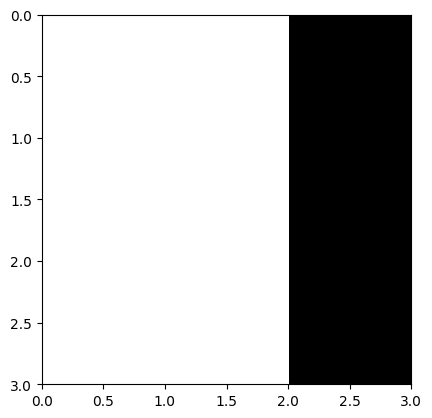

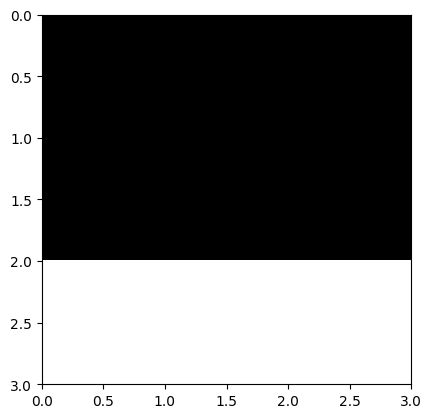

In [29]:
# 2D 3x3 binary image with vertical edge
image1 = np.array([[1,1,0], [1,1,0], [1,1,0]])

# 2D 3x3 binary image with horizontal edge
image2 = np.array([[0,0,0], [0,0,0], [1,1,1]])

# On plotting the images
plt.imshow(image1, cmap='gray', extent=[0, 3, 3, 0])
plt.show()
plt.imshow(image2, cmap='gray', extent=[0, 3, 3, 0])
plt.show()

In [30]:
# Vertical Line filter
filter = np.array([[1,0,-1],
                   [1,0,-1],
                   [1,0,-1]])

# Applying filter to first image
output = np.sum(np.multiply(image1, filter))
print('Output from first image: ', output)

# Applying filter to second image
output = np.sum(np.multiply(image2, filter))
print('Output from second image: ', output)

Output from first image:  3
Output from second image:  0


In [31]:
# Horizontal edge filter
filter = np.array([[-1,-1,-1],
                   [ 0, 0, 0],
                   [ 1, 1, 1]])

output = np.sum(np.multiply(image1, filter))
print('Output from first image: ', output)

output = np.sum(np.multiply(image2, filter))
print('Output from second image: ', output)

Output from first image:  0
Output from second image:  3


Non-zero output suggests that there is a vertical edge present in the first image and not present in the second image. Similarly, horizontal edge is detected in second.

Let's define a function to use convolution layer from Pytorch and use our own kernel to detect edges in image

In [32]:
def apply_conv(image, kernel, padding=0, stride=1):

  #--------IMAGE PREPROCESSING-------
  image = torch.from_numpy(image)
  # Pytorch requires input to convolution in (N,C,H,W), where N = batch size and C=#channels in input
  input = image.view((1,1,image.shape[0], image.shape[1]))

  # --------------KERNEL-------------
  kernel = torch.from_numpy(kernel.astype(np.float32))

  # Pytorch requires kernel of shape (N,C,H,W), where N = batch size and C=#channels in input
  kernel = kernel.view((1,1,kernel.shape[0], kernel.shape[1]))

  # ---------CONVOLUTION LAYER from Pytorch--------
  conv = Conv2d(in_channels=1, out_channels=1, kernel_size=kernel.shape, padding=padding, stride=stride)

  # Set the kernel weights in the convolution layer
  conv.weight = torch.nn.Parameter(kernel)
  
  # ---------APPLY CONVOLUTION--------
  output = conv(input.float())
  output_img = output.data.numpy()  # Tensor to back in numpy
  output_img = output_img.reshape((-1, output_img.shape[-1])) # Reshape to 2D image

  return output_img

In [33]:
# Our original lotus image
image = cv2.imread('/content/grid1 (1).jpg', 0)

filter = np.array([[-1,-1,-1],
                   [ 0, 0, 0],
                   [ 1, 1, 1]])

out1 = apply_conv(image, filter, padding=0, stride=1)

filter = np.array([[1,0,-1],
                   [1,0,-1],
                   [1,0,-1]])

out2 = apply_conv(image, filter, padding=0, stride=1)

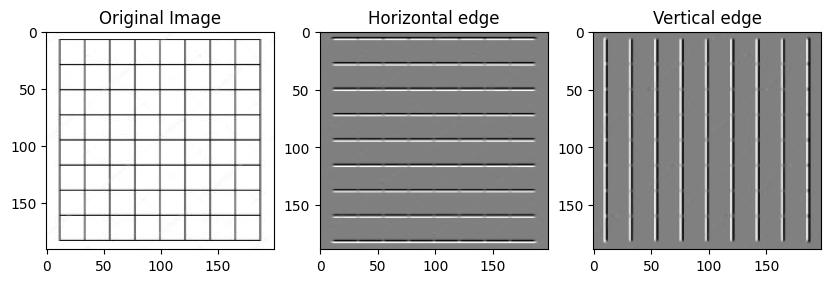

In [34]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,3,1)
ax.imshow(image, cmap='gray')
ax.set_title('Original Image')
ax = fig.add_subplot(1,3,2)
ax.set_title('Horizontal edge')
ax.imshow(out1, cmap='gray')
ax = fig.add_subplot(1,3,3)
ax.imshow(out2, cmap='gray')
ax.set_title('Vertical edge')
plt.show()


## Pooling Layers

Pooling layers are used to reduce the dimensions of the feature maps. Thus, it reduces the number of parameters to learn and the amount of computation performed in the network. The pooling layer summarises the features present in a region of the feature map generated by a convolution layer.

1) Max Pooling:

<img src='https://media.geeksforgeeks.org/wp-content/uploads/20190721025744/Screenshot-2019-07-21-at-2.57.13-AM.png' height=150px/>

2) Average Pooling:

<img src='https://media.geeksforgeeks.org/wp-content/uploads/20190721030705/Screenshot-2019-07-21-at-3.05.56-AM.png' height=150px/>

## Softmax layer/activation
Recall that logistic regression produces a decimal between 0 and 1.0. For example, a logistic regression output of 0.8 from an email classifier suggests an 80% chance of an email being spam and a 20% chance of it being not spam. Clearly, the sum of the probabilities of an email being either spam or not spam is 1.0.

Softmax extends this idea into a multi-class world. That is, Softmax assigns decimal probabilities to each class in a multi-class problem. Those decimal probabilities must add up to 1.0. This additional constraint helps training converge more quickly than it otherwise would.
Softmax is implemented through a neural network layer just before the output layer. The Softmax layer must have the same number of nodes as the output layer.

<img src='https://miro.medium.com/max/1400/1*ReYpdIZ3ZSAPb2W8cJpkBg.jpeg' height=170px />

## Learning to train a CNN network

In [35]:
# Import packages
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [36]:
#  Images returned from torchvision dataset classes is in range [0,1]
# We transform them to tensors and normalize them to range [-1,1] using 'Normalize' transform

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 128

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

# Classes in CIFAR10
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [37]:
print('Training data shape : ', trainset.data.shape, len(trainset.targets))
print('Testing data shape : ', testset.data.shape, len(testset.targets))

# Find the unique numbers from the train labels
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Training data shape :  (50000, 32, 32, 3) 50000
Testing data shape :  (10000, 32, 32, 3) 10000
Total number of outputs :  10
Output classes :  ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


In [38]:
def train(num_epochs, model, train_loader, loss_func, optimizer):

  # Training mode
  model.train()

  train_losses = []
  train_acc = []

  # Train the model
  for epoch in range(num_epochs):
    running_loss = 0
    running_acc = 0
    for i, (images, labels) in enumerate(train_loader):
      
      # clear gradients for this training step   
      optimizer.zero_grad()           

      # Forward pass
      output = model(images)

      # Calculate loss
      loss = loss_func(output, labels)

      # Backpropagation, compute gradients 
      loss.backward()

      # Apply gradients             
      optimizer.step()                
      
      # Running loss
      running_loss += loss.item()

      # indices of max probabilities
      _, preds = torch.max(output, dim=1)

      # Calculate number of correct predictions
      correct = (preds.float() == labels).sum()
      running_acc += correct

      # Average loss and acc values 
      epoch_loss = running_loss / len(train_loader.dataset)
      epoch_acc = running_acc / len(train_loader.dataset)

    train_losses.append(epoch_loss)
    train_acc.append(epoch_acc)
    print ('Epoch {}/{}, Loss: {:.4f}, Accuracy: {:.4f}'.format(epoch + 1, num_epochs, epoch_loss, epoch_acc*100))

  return train_losses, train_acc

In [39]:
def test_model(model, testloader):
  correct = 0
  total = 0
  # Deactivate autograd engine (don't compute grads since we're not training)
  with torch.no_grad():
    for data in testloader:
        images, labels = data
        # Calculate outputs by running images through the network
        outputs = model(images)
        # The class with the highest value is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

  print('Accuracy of the network: %d %%' % (
      100 * correct / total))

In [48]:
# CNN with 2 CONV layers and 3 FC layers
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.fc1 = nn.Linear(32 * 5 * 5, 512)
        self.fc2 = nn.Linear(512, 128)
        # output layer 10 classes
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        # flatten all dimensions except batch
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [41]:
model = Net()
print(model)

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


In [42]:
# Cross Entropy loss for multi-class classification
criterion = nn.CrossEntropyLoss()

In [43]:
# SGD optimizer with momentum
optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.9)

In [18]:
num_epochs = 5  # iterations
train_losses, train_acc = train(num_epochs, model, trainloader, criterion, optimizer)

Epoch 1/5, Loss: 0.0130, Accuracy: 38.9200
Epoch 2/5, Loss: 0.0095, Accuracy: 56.9040
Epoch 3/5, Loss: 0.0079, Accuracy: 64.6180
Epoch 4/5, Loss: 0.0066, Accuracy: 70.2360
Epoch 5/5, Loss: 0.0057, Accuracy: 74.1780


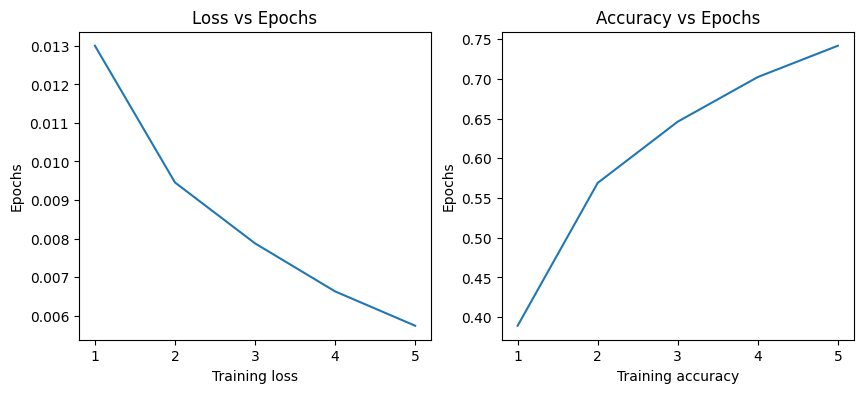

In [19]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,2, 1)
ax.plot(np.arange(1,len(train_losses)+1),train_losses)
plt.xlabel('Training loss')
plt.ylabel('Epochs')
ax.set_title('Loss vs Epochs')
ax = fig.add_subplot(1,2, 2)
ax.plot(np.arange(1,len(train_acc)+1),train_acc)
plt.xlabel('Training accuracy')
plt.ylabel('Epochs')
ax.set_title('Accuracy vs Epochs')
plt.show()

In [20]:
# Accuracy on test data after training
test_model(model, testloader)

Accuracy of the network: 68 %


## Questions
1) List some reasons why we should prefer CNN over ANN for image classification?

2) Try improving the CNN performance further by tuning the hyperparameters(epochs, optimizer, LR etc). Report the improved test accuracy.

3) What happens if you reduce the number of convolution layers to only 1?

4) Why didn't we use the Softmax activation in the last layer of CNN?


1.  CNNs are designed to exploit the spatial structure of images.

      They have spatial invariance, allowing them to recognize objects regardless of their position in the image.

      CNNs capture local patterns and spatial relationships between adjacent pixels.

      Parameter sharing in CNNs reduces the number of parameters and helps in generalization and avoiding overfitting.

      Pooling layers in CNNs downsample feature maps, improving computational efficiency and providing spatial invariance.
      CNNs learn feature hierarchies, capturing both low-level and high-level visual features.

      Pre-trained CNN architectures offer robust and powerful feature representations for image classification tasks.

      CNN operations are computationally efficient and well-suited for parallel processing on GPUs.
      
      CNNs provide some level of interpretability through visualizing learned filters and feature maps.

2.  Optimizing the parameters

Using num_epochs= 5 criterion = CrossEntropyLoss() and optimizer = SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.05
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)
Files already downloaded and verified
Files already downloaded and verified
Epoch 1/5, Loss: 0.0031, Accuracy: 86.3160
Epoch 2/5, Loss: 0.0027, Accuracy: 88.0460
Epoch 3/5, Loss: 0.0025, Accuracy: 89.0580
Epoch 4/5, Loss: 0.0023, Accuracy: 90.1780
Epoch 5/5, Loss: 0.0021, Accuracy: 90.9020


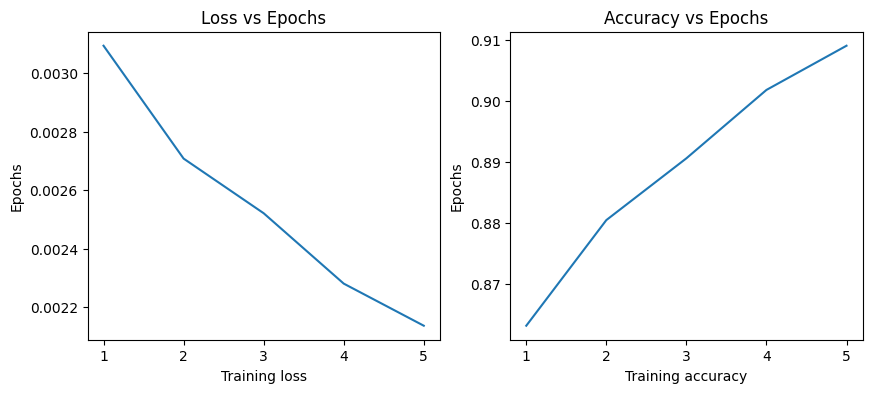

Accuracy of the network: 65 %




Using num_epochs= 5 criterion = CrossEntropyLoss() and optimizer = Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)
Files already downloaded and verified
Files already downloaded and verified
Epoch 1/5, Loss: 0.0008, Accuracy: 96.6160
Epoch 2/5, Loss: 0.0003, Accuracy: 98.8560
Epoch 3/5, Loss: 0.0004, Accuracy: 98.4700
Epoch 4/5, Loss: 0.0004, Accuracy: 98.3000
Epoch 5/5, Loss: 0.0002, Accuracy: 99.1320


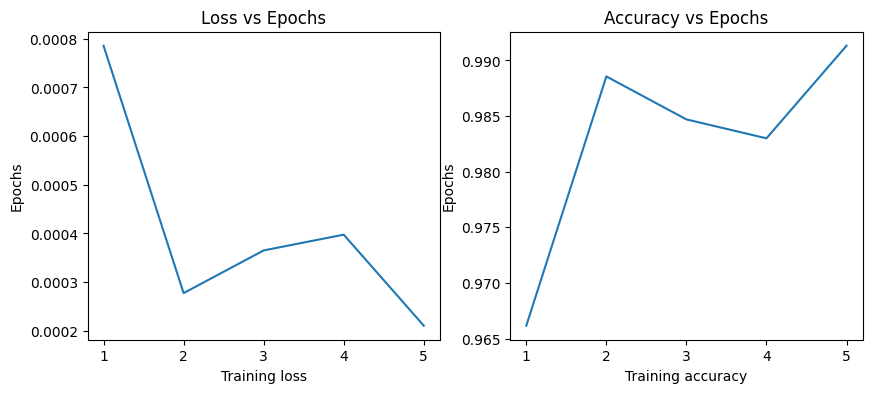

Accuracy of the network: 69 %




Using num_epochs= 10 criterion = CrossEntropyLoss() and optimizer = SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.05
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)
Files already downloaded and verified
Files already downloaded and verified
Epoch 1/10, Loss: 0.0025, Accuracy: 90.0900
Epoch 2/10, Loss: 0.0021, Accuracy: 91.6660
Epoch 3/10, Loss: 0.0019, Accuracy: 92.3820
Epoch 4/10, Loss: 0.0019, Accuracy: 92.5180
Epoch 5/10, Loss: 0.0020, Accuracy: 92.3060
Epoch 6/10, Loss: 0.0018, Accuracy: 93.1260
Epoch 7/10, Loss: 0.0021, Accuracy: 92.1000
Epoch 8/10, Loss: 0.0020, Accuracy: 92.4300
Epoch 9/10, Loss: 0.0018, Accuracy: 93.2660
Epoch 10/10, Loss: 0.0021, Accuracy: 92.2680


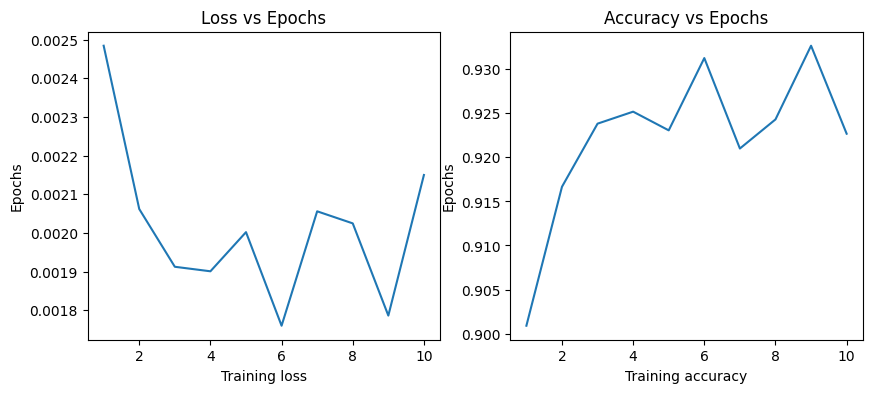

Accuracy of the network: 64 %




Using num_epochs= 10 criterion = CrossEntropyLoss() and optimizer = Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)
Files already downloaded and verified
Files already downloaded and verified
Epoch 1/10, Loss: 0.0007, Accuracy: 97.2020
Epoch 2/10, Loss: 0.0002, Accuracy: 99.3260
Epoch 3/10, Loss: 0.0001, Accuracy: 99.7700
Epoch 4/10, Loss: 0.0000, Accuracy: 99.8980
Epoch 5/10, Loss: 0.0001, Accuracy: 99.5960
Epoch 6/10, Loss: 0.0004, Accuracy: 98.4560
Epoch 7/10, Loss: 0.0003, Accuracy: 98.9160
Epoch 8/10, Loss: 0.0002, Accuracy: 99.3200
Epoch 9/10, Loss: 0.0002, Accuracy: 99.3440
Epoch 10/10, Loss: 0.0002, Accuracy: 99.2520


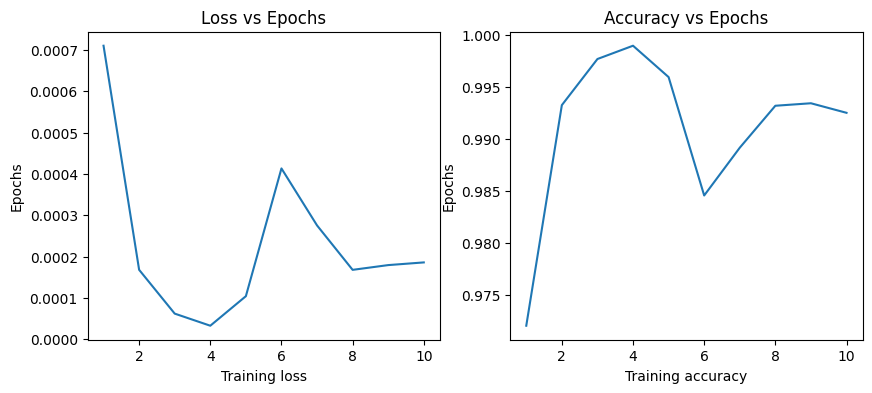

Accuracy of the network: 67 %




Using num_epochs= 15 criterion = CrossEntropyLoss() and optimizer = SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.05
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)
Files already downloaded and verified
Files already downloaded and verified
Epoch 1/15, Loss: 0.0027, Accuracy: 91.3260
Epoch 2/15, Loss: 0.0024, Accuracy: 91.7920
Epoch 3/15, Loss: 0.0026, Accuracy: 91.1180
Epoch 4/15, Loss: 0.0023, Accuracy: 91.9180
Epoch 5/15, Loss: 0.0025, Accuracy: 91.6400
Epoch 6/15, Loss: 0.0024, Accuracy: 92.1060
Epoch 7/15, Loss: 0.0023, Accuracy: 92.3200
Epoch 8/15, Loss: 0.0026, Accuracy: 91.4620
Epoch 9/15, Loss: 0.0029, Accuracy: 90.9960
Epoch 10/15, Loss: 0.0026, Accuracy: 91.7840
Epoch 11/15, Loss: 0.0025, Accuracy: 92.1400
Epoch 12/15, Loss: 0.0030, Accuracy: 90.8220
Epoch 13/15, Loss: 0.0029, Accuracy: 91.3480
Epoch 14/15, Loss: 0.0032, Accuracy: 90.4220
Epoch 15/15, Loss: 0.00

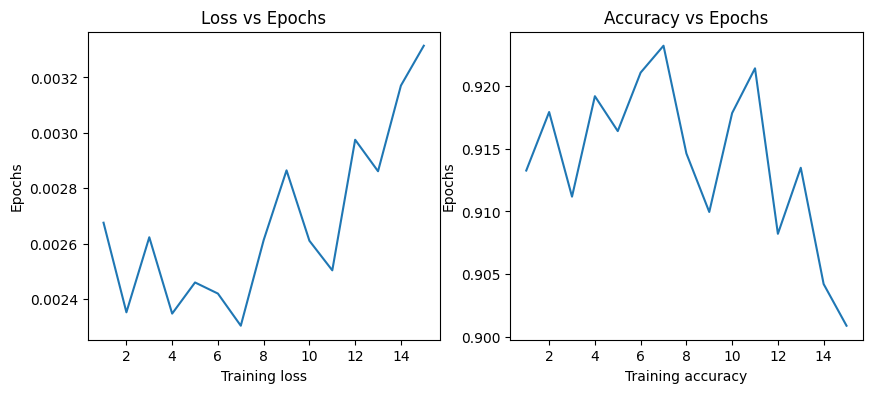

Accuracy of the network: 59 %




Using num_epochs= 15 criterion = CrossEntropyLoss() and optimizer = Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)
Files already downloaded and verified
Files already downloaded and verified
Epoch 1/15, Loss: 0.0012, Accuracy: 95.9660
Epoch 2/15, Loss: 0.0003, Accuracy: 99.0020
Epoch 3/15, Loss: 0.0001, Accuracy: 99.7160
Epoch 4/15, Loss: 0.0000, Accuracy: 99.8900
Epoch 5/15, Loss: 0.0000, Accuracy: 99.9360
Epoch 6/15, Loss: 0.0000, Accuracy: 99.9540
Epoch 7/15, Loss: 0.0000, Accuracy: 99.9620
Epoch 8/15, Loss: 0.0000, Accuracy: 99.9720
Epoch 9/15, Loss: 0.0000, Accuracy: 99.9680
Epoch 10/15, Loss: 0.0000, Accuracy: 99.9760
Epoch 11/15, Loss: 0.0000, Accuracy: 99.9780
Epoch 12/15, Loss: 0.0000, Accuracy: 99.9800
Epoch 13/15, Loss: 0.0001, Accuracy: 99.7940
Epoch 14/15, Loss: 0.0012

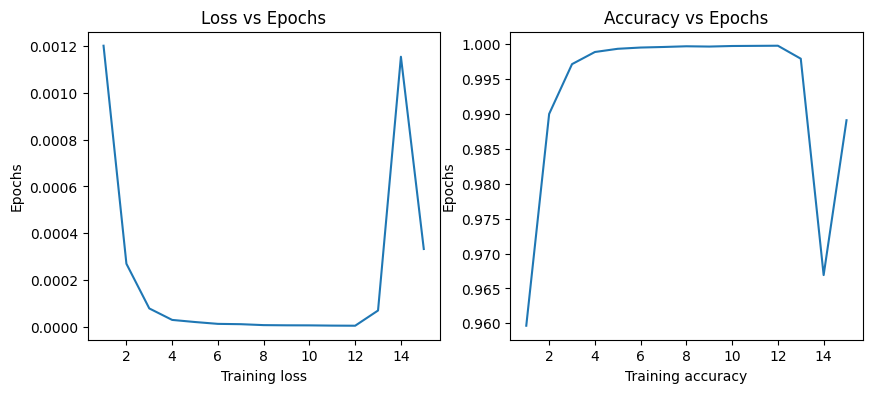

Accuracy of the network: 66 %






In [47]:
def plot_and_train(num_epochs,criterion,optimizer):
  transform = transforms.Compose(
      [transforms.ToTensor(),
      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

  batch_size = 128

  trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                          download=True, transform=transform)
  trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                            shuffle=True, num_workers=2)

  testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=transform)
  testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                          shuffle=False, num_workers=2)

  # Classes in CIFAR10
  classes = ('plane', 'car', 'bird', 'cat',
            'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
  
  train_losses, train_acc = train(num_epochs, model, trainloader, criterion, optimizer)

  fig = plt.figure(figsize=(10,4))
  ax = fig.add_subplot(1,2, 1)
  ax.plot(np.arange(1,len(train_losses)+1),train_losses)
  plt.xlabel('Training loss')
  plt.ylabel('Epochs')
  ax.set_title('Loss vs Epochs')
  ax = fig.add_subplot(1,2, 2)
  ax.plot(np.arange(1,len(train_acc)+1),train_acc)
  plt.xlabel('Training accuracy')
  plt.ylabel('Epochs')
  ax.set_title('Accuracy vs Epochs')
  plt.show()

  # Accuracy on test data after training
  test_model(model, testloader)


num_epochs_list = [5, 10, 15]
criterion_list = [nn.CrossEntropyLoss()]
optimizer_list = [optim.SGD(model.parameters(), lr=0.05, momentum=0.9), optim.Adam(model.parameters(), lr=0.001)]

# Iterate through all combinations
for num_epochs in num_epochs_list:
    for criterion in criterion_list:
        for optimizer in optimizer_list:
            print('Using num_epochs=',num_epochs,'criterion =',criterion,'and optimizer =',optimizer)
            plot_and_train(num_epochs, criterion, optimizer)
            print('\n\n\n')

Using num_epochs= 5,
criterion = CrossEntropyLoss() and optimizer = Adam (lr: 0.001)

**We get max accuracy of 69%**

3. If you reduce the number of convolution layers to only 1 in the given CNN architecture, the model will have less capacity to learn complex features and patterns from the input data. This may result in a decrease in the model's performance and ability to capture fine-grained details.

4. The reason why we typically don't use the Softmax activation function in the last layer of a Convolutional Neural Network (CNN) for multi-class classification is that it is often incorporated as part of the loss function.

  The Softmax activation function is commonly used to convert the final layer's outputs into probabilities, where each output represents the likelihood of the input belonging to a specific class. However, in the context of multi-class classification, the Cross-Entropy loss function is commonly used, which already incorporates the Softmax function.

  The Cross-Entropy loss function combines the Softmax activation and the calculation of the loss in a numerically stable manner. It takes the output probabilities from the last layer and compares them to the true labels, calculating the loss as the negative log-likelihood of the correct class.

  By combining the Softmax activation and loss calculation in the Cross-Entropy loss function, we can simplify the network architecture and training process. The Softmax activation is not explicitly applied in the last layer because it is already included in the loss function, which ensures the proper calculation of probabilities and gradients during training.

  In summary, we don't use the Softmax activation in the last layer of a CNN for multi-class classification because it is typically incorporated in the Cross-Entropy loss function, simplifying the network architecture and training process